In [7]:
%matplotlib inline
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error

import matplotlib.pyplot as plt

#### Ordinary Least Squares
Attempts to “draw” a line with the smallest sum of the squares of all errors.(in this following case, the distance from a point to the line)<br>

• This is a regression model not a classifier.
<br>• It creates a line of best fit for predicting/creating data – not classifying data

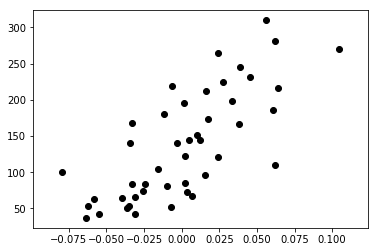

In [4]:
diabetes = datasets.load_diabetes()

# Using only one feature to visualize in 2D

# bmi
X = diabetes.data[:, np.newaxis, 2]
# quantitative measure of disease progression
y = diabetes.target

X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.1)
plt.scatter(X_test, y_test,  color='black')

Coefficients :  [ 915.92682363]
Intercept :  153.867624487
Mean squared error :  3128.84114082


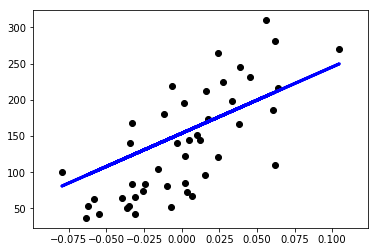

In [8]:
model = LinearRegression()
model = model.fit(X_train, y_train)
slope = model.coef_[0]
intercept = model.intercept_
print("Coefficients : ",model.coef_)
print("Intercept : ", model.intercept_)

y_pred = model.predict(X_test)
print("Mean squared error : ", mean_squared_error(y_test, y_pred))

# x_ = np.linspace(-.2, .2, 100)
# y_ = slope*x_ + intercept

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
# plt.plot(x_, y_, color='green')

#### Perceptrons
- Are the beginning of Neural Networks (ANNs are simple multi-layered Perceptrons)
- Uses input and output nodes
- Input nodes are connected to output nodes via weighted links (Thresholds)
- Calculates output value by computing the weighted sum of its input values
- Used to classify data that is linearly seperable
    - w1\*x1 + w2\*x2 + b = 0

![perceptron](perceptron.png)

In [10]:
data = [[0, 0, 0], 
        [0, 0, 1], 
        [0, 1, 0], 
        [0, 1, 1], 
        [1, 0, 1], 
        [1, 1, 0],
        [1, 1, 1]]

# -1 if str has 2 or more 0s, +1 if has 2 or more 1s
labels = [-1, -1, -1, 1, 1, 1, 1]

clf = Perceptron(n_iter = 100)
clf = clf.fit(data, labels)

print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

test = [[1, 0, 0]]

print()
print("Prediction:", clf.predict(test))



Coefficients: [[ 3.  3.  2.]]
Intercept: [-4.]

Prediction: [-1]


#### Comparison of various Classifiers with iris dataset.

In [11]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [12]:
iris = datasets.load_iris()

data_train, data_test, labels_train, labels_test = train_test_split(
    iris.data, iris.target, test_size=0.4)

algs = [
    GaussianNB(), 
    DecisionTreeClassifier(),
    MultinomialNB(),
    BernoulliNB(), 
    Perceptron(), 
    LogisticRegression(), 
]

# Run through each classifier, train them with the training dataset, then test it using the score function
for alg in algs:
    alg = alg.fit(data_train, labels_train)
    print(type(alg).__name__, alg.score(data_test, labels_test))

GaussianNB 0.95
DecisionTreeClassifier 0.966666666667
MultinomialNB 0.9
BernoulliNB 0.216666666667
Perceptron 0.616666666667
LogisticRegression 0.933333333333
